# Homework #1 

In [24]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [25]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [26]:
# Target names 
target_names = {}
for idx, name in enumerate( iris.target_names):
    target_names[idx] = str(name)
    
print(f"Target labels: {target_names}")

df['target_name'] = df['target'].map(target_names)
df

Target labels: {0: 'setosa', 1: 'versicolor', 2: 'virginica'}


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [27]:
# Statistic
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


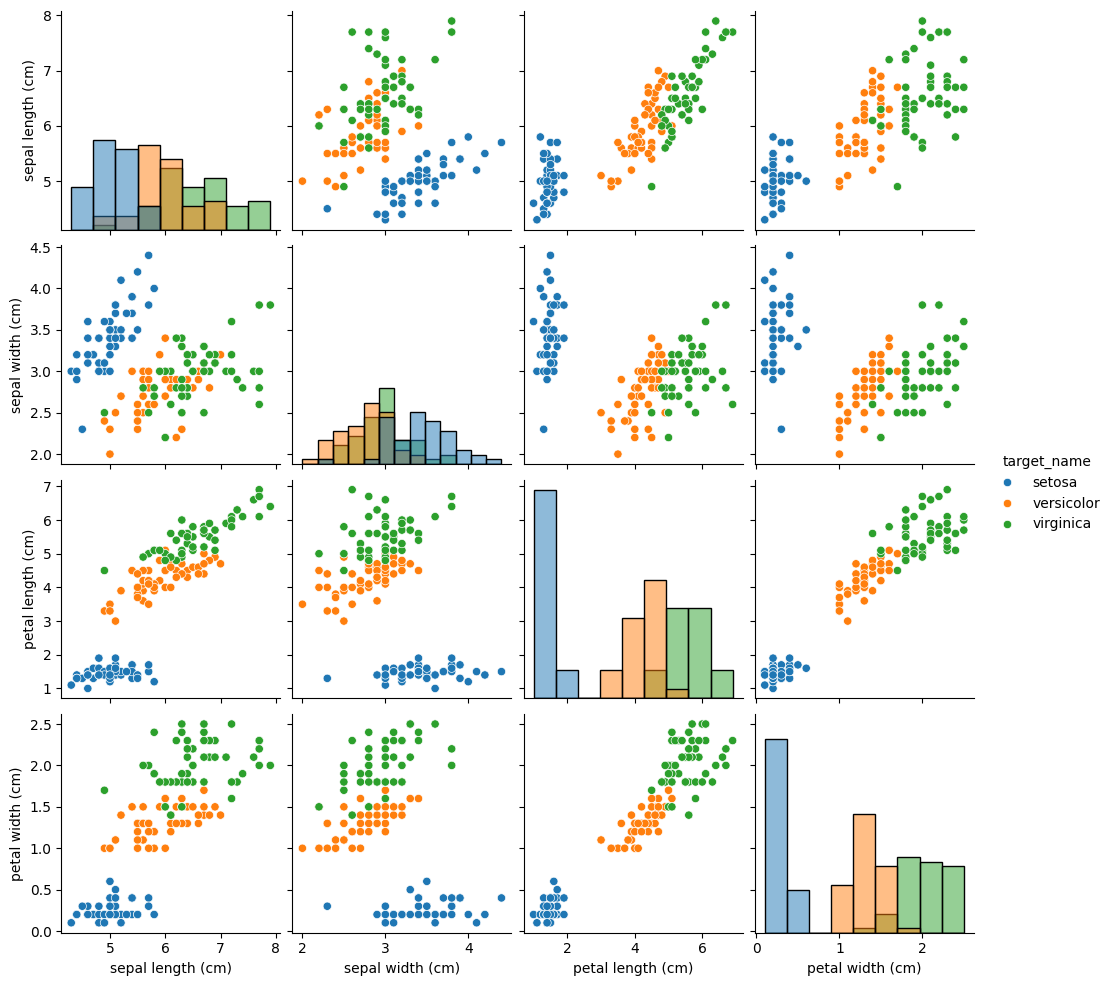

In [35]:
# Visualization
feature_cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
sns.pairplot(df, vars=feature_cols, hue='target_name', palette='tab10', diag_kind='hist')

In [29]:
# Standardization
scaler = StandardScaler()
X_scaled = scaler.set_output(transform='pandas').fit_transform(X)
X_scaled.describe()

,x0,x1,x2,x3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [30]:
# Spectral Clustering
spec = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)
predict_labels = spec.fit_predict(X_scaled)
df['predict_label'] = predict_labels
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,predict_label
0,5.1,3.5,1.4,0.2,0,setosa,1
1,4.9,3.0,1.4,0.2,0,setosa,1
2,4.7,3.2,1.3,0.2,0,setosa,1
3,4.6,3.1,1.5,0.2,0,setosa,1
4,5.0,3.6,1.4,0.2,0,setosa,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica,0
146,6.3,2.5,5.0,1.9,2,virginica,2
147,6.5,3.0,5.2,2.0,2,virginica,0
148,6.2,3.4,5.4,2.3,2,virginica,0


Confusion matrix:
 [[ 0 49  1]
 [ 3  0 47]
 [32  0 18]]


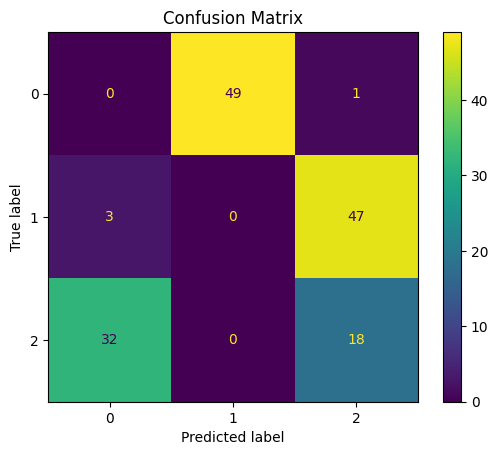

In [31]:
# Cinfusion Matrix
cm = confusion_matrix(df['target'], df['predict_label'])
print(f"Confusion matrix:\n {cm}")

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Confusion Matrix")
plt.show()

In [32]:
# Predicted labelmanes
predict_label_names = {
    1: 'setosa',      
    2: 'versicolor',  
    0: 'virginica'   
}

df['pred_label_name'] = df['predict_label'].map(predict_label_names)

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,predict_label,pred_label_name
0,5.1,3.5,1.4,0.2,0,setosa,1,setosa
1,4.9,3.0,1.4,0.2,0,setosa,1,setosa
2,4.7,3.2,1.3,0.2,0,setosa,1,setosa
3,4.6,3.1,1.5,0.2,0,setosa,1,setosa
4,5.0,3.6,1.4,0.2,0,setosa,1,setosa
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica,0,virginica
146,6.3,2.5,5.0,1.9,2,virginica,2,versicolor
147,6.5,3.0,5.2,2.0,2,virginica,0,virginica
148,6.2,3.4,5.4,2.3,2,virginica,0,virginica


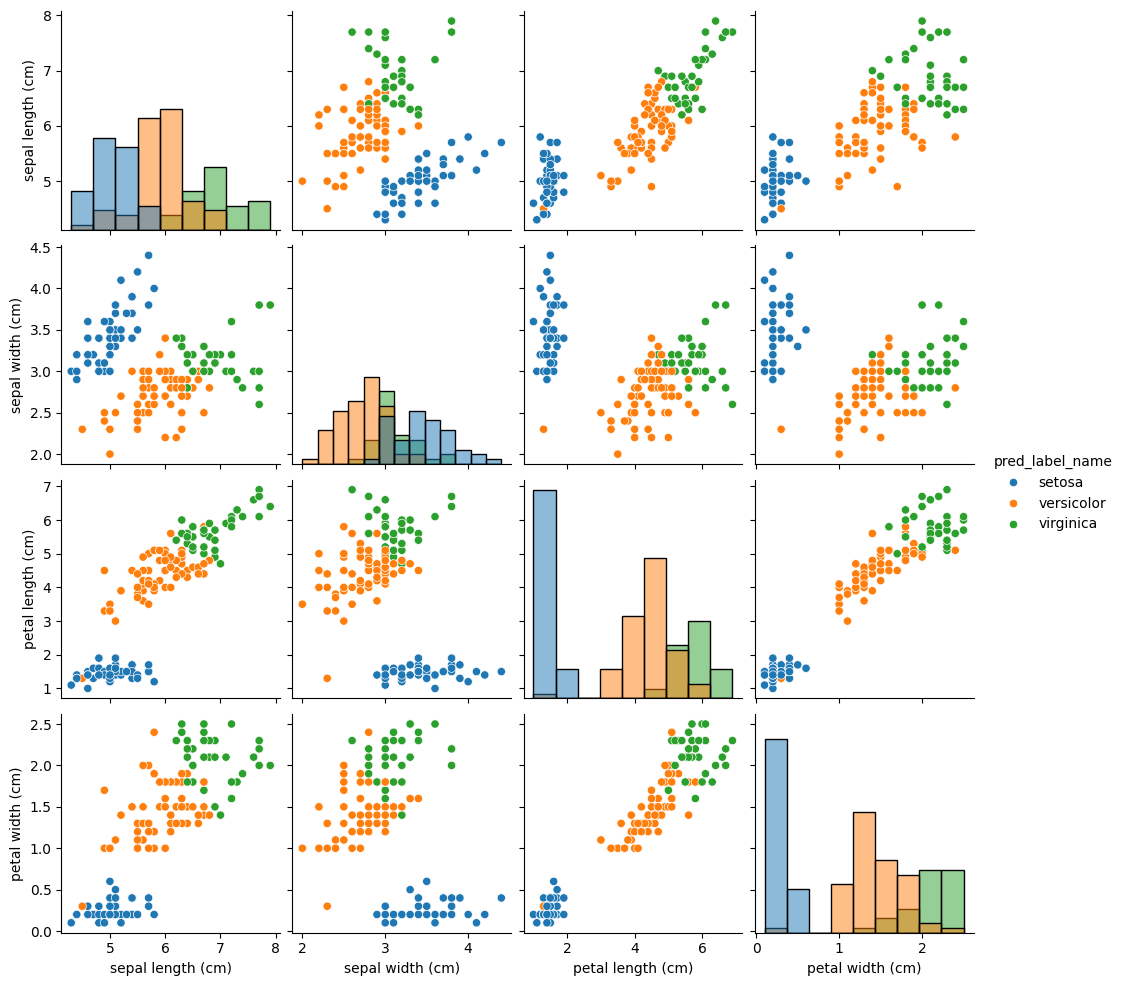

In [33]:
feature_cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
sns.pairplot(df, vars=feature_cols, hue='pred_label_name', palette='tab10', diag_kind='hist')

### Conclusion
The Spectral Clustering approach successfully identified the first cluster (Setosa) with 98% accuracy (49 correct, 1 incorrect).

However, the model struggled to distinguish the last two clusters (*Versicolor and  Virginica*) due to the high similarity in their feature values, resulting in 18 Virginica samples being misclassified into the Versicolor. This is a typical case of class overlap.